In [1]:
import pandas as pd

df = pd.read_csv("v2_DataScienceSalaries_aijobs.csv")

arrtributes = df.columns
datasample = len(df)

print(arrtributes)
print(datasample)
fehlerdaten = df.isna()
print(fehlerdaten)

Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
3470
      Job Title  Employment Type  Experience Level  Expertise Level  Salary  \
0         False            False             False            False   False   
1         False            False             False            False   False   
2         False            False             False            False   False   
3         False            False             False            False   False   
4         False            False             False            False   False   
...         ...              ...               ...              ...     ...   
3465      False            False             False            False   False   
3466      False            False             False            False   False   
3467      False            False             False       

In [2]:
fehlerdaten = df.notna().sum()
print(fehlerdaten)


Job Title             3470
Employment Type       3470
Experience Level      3470
Expertise Level       3470
Salary                3470
Salary Currency       3470
Company Location      3470
Salary in USD         3470
Employee Residence    3470
Company Size          3470
Year                  3470
dtype: int64


In [3]:
nulldatensatz = df.notnull().sum()
print(nulldatensatz)

Job Title             3470
Employment Type       3470
Experience Level      3470
Expertise Level       3470
Salary                3470
Salary Currency       3470
Company Location      3470
Salary in USD         3470
Employee Residence    3470
Company Size          3470
Year                  3470
dtype: int64


In [4]:
df.duplicated().sum()

0

In [5]:
df.head(1)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023


# INFOBLATT METADATEN

Anzahl Datensätze : 3470
Keine Redundante Datenzätze
Keine leeren Datensätze
Anzahl Attribute: 11
print(nulldatensatz)
Attribute: 
- Job Title             
- Employment Type       
- Experience Level      
- Expertise Level       
- Salary                
- Salary Currency       
- Company Location      
- Salary in USD         
- Employee Residence    
- Company Size          
- Year                 

1 **Dataset**
Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023


In [6]:
df["Salary in USD"].describe()

count      3470.000000
mean     142385.374640
std       68730.522053
min       15000.000000
25%       91029.500000
50%      136000.000000
75%      185000.000000
max      450000.000000
Name: Salary in USD, dtype: float64

In [7]:
df.groupby("Experience Level")["Salary in USD"].describe()
    

,count,mean,std,min,25%,50%,75%,max
Experience Level,,,,,,,,
Entry,296.0,79669.162162,47975.904438,15000.0,45547.5,69512.5,104268.0,250800.0
Executive,154.0,188583.987013,70904.317341,15000.0,135086.0,183580.0,233750.0,416000.0
Mid,833.0,109195.112845,59439.197245,15000.0,66022.0,100000.0,140000.0,450000.0
Senior,2187.0,160262.329675,63771.316240,15809.0,115220.0,153090.0,199000.0,417937.0


<Axes: xlabel='Experience Level', ylabel='Salary in USD'>

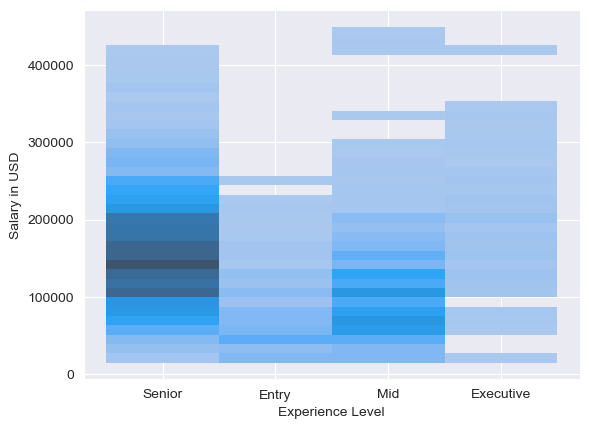

In [8]:
import seaborn as sns
sns.histplot(data=df,x="Experience Level",y="Salary in USD",legend=True,stat="density")

**Salary ist schlechter da es in Unterschiedlichen Währungen gehandhabt wird. Um es zu Standartisieren und zu vergleichen ist Salary in USD besser geeignet.**

<Axes: xlabel='Experience Level', ylabel='Salary in USD'>

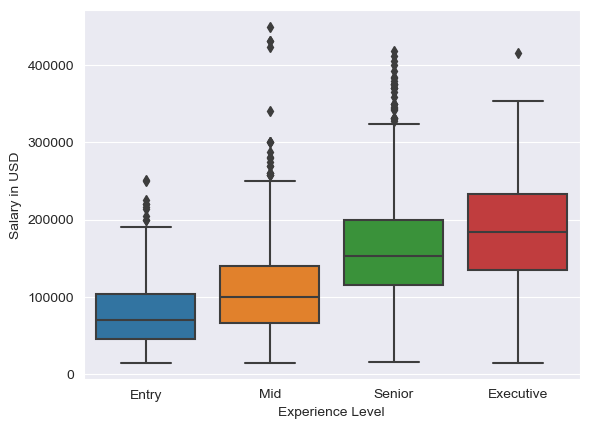

In [9]:
sns.boxplot(data=df,x="Experience Level",y="Salary in USD",order=["Entry","Mid","Senior","Executive"])

<Axes: xlabel='Year', ylabel='Salary in USD'>

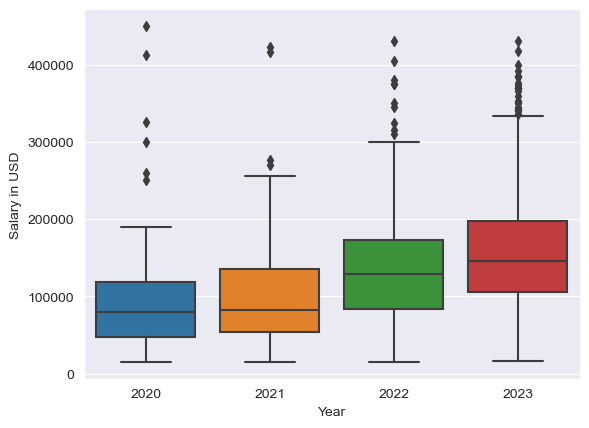

In [10]:
sns.boxplot(data=df,x="Year",y="Salary in USD")

<Axes: xlabel='Company Size', ylabel='Salary in USD'>

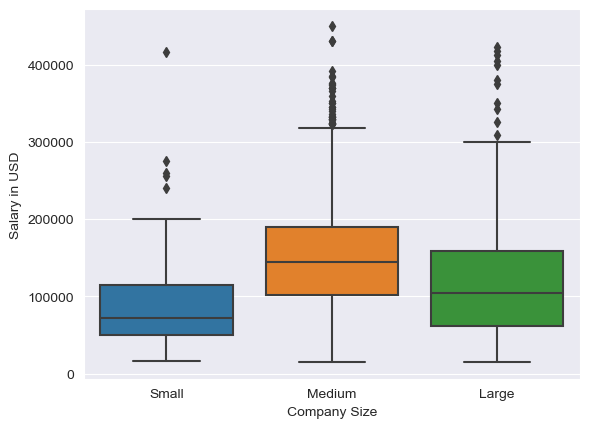

In [11]:
sns.boxplot(data=df,x="Company Size",y="Salary in USD", order=["Small","Medium","Large"])

<Axes: xlabel='Salary in USD', ylabel='Company Location'>

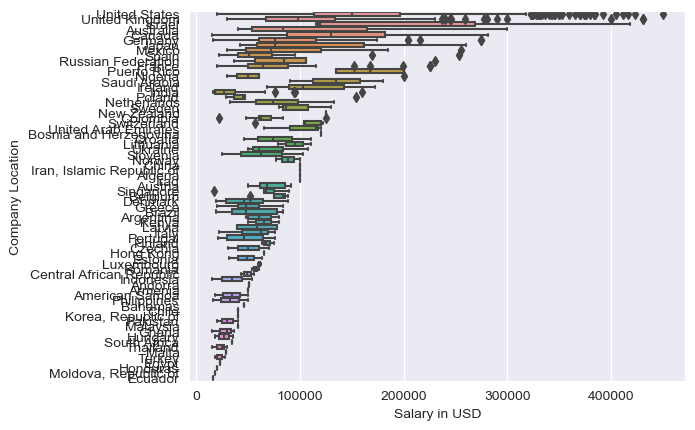

In [12]:
sns.boxplot(data=df.sort_values("Salary in USD",ascending=False),y="Company Location",x="Salary in USD")

<Axes: xlabel='Salary in USD', ylabel='Company Location'>

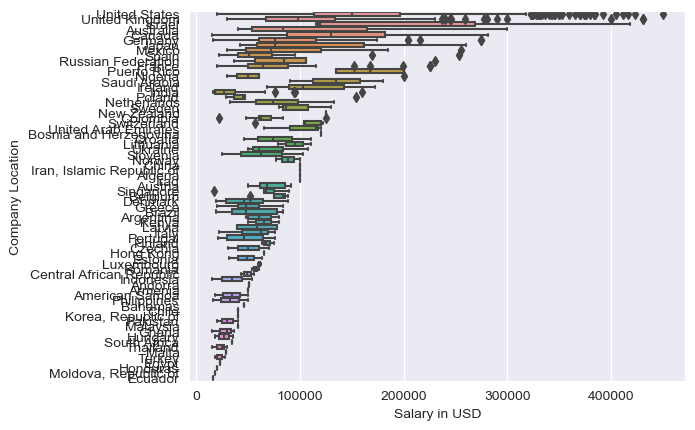

In [13]:
sns.boxplot(data=df.sort_values("Salary in USD",ascending=False),y="Company Location",x="Salary in USD")

<Axes: xlabel='Salary in USD', ylabel='Company Location'>

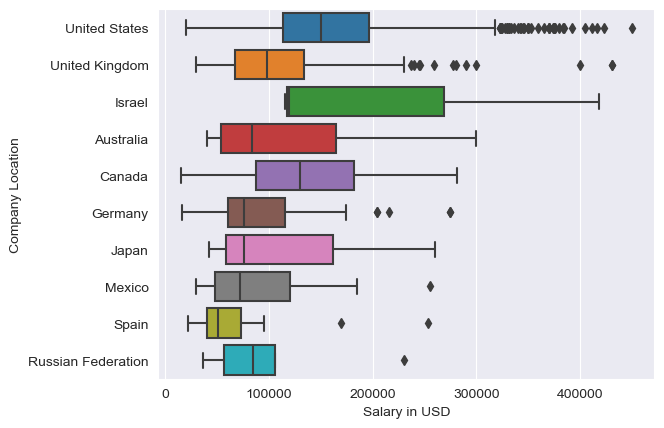

In [14]:
# Order by max salary in usd

average_salaries = df.groupby('Company Location')['Salary in USD'].max()
top_countries = average_salaries.nlargest(10)

top_countries_list = top_countries.index.tolist()
filtered_df = df[df['Company Location'].isin(top_countries_list)]

sns.boxplot(data=filtered_df.sort_values('Salary in USD', ascending=False),y="Company Location",x="Salary in USD")

<Axes: xlabel='Salary in USD', ylabel='Company Location'>

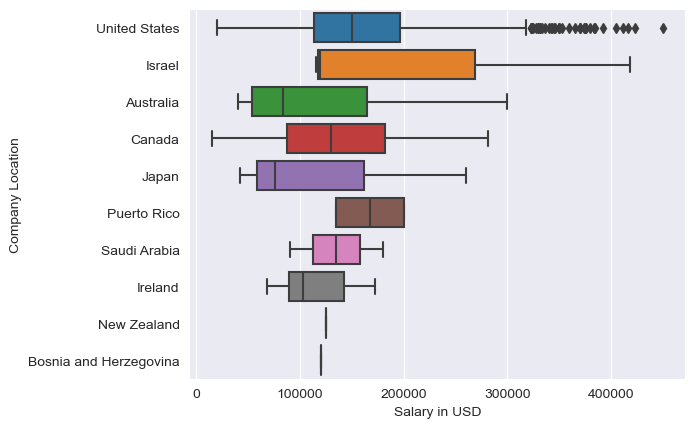

In [15]:
# Order by average salary in usd

average_salaries = df.groupby('Company Location')['Salary in USD'].mean()
top_countries = average_salaries.nlargest(10)

top_countries_list = top_countries.index.tolist()
filtered_df = df[df['Company Location'].isin(top_countries_list)]

sns.boxplot(data=filtered_df.sort_values('Salary in USD', ascending=False),y="Company Location",x="Salary in USD")